In [62]:
import pandas as pd
import seaborn as sns

# Chargement des données et exploration

In [63]:
# 1 - Charger dans un dataframe le jeu de données CSV
df = pd.read_csv("./data/student-por.csv", delimiter=";")
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [64]:
# 2 - Vérifier combien d’observations contient le dataset et la distribution de chacune des variables (min, max, mean etc…)
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


<Axes: >

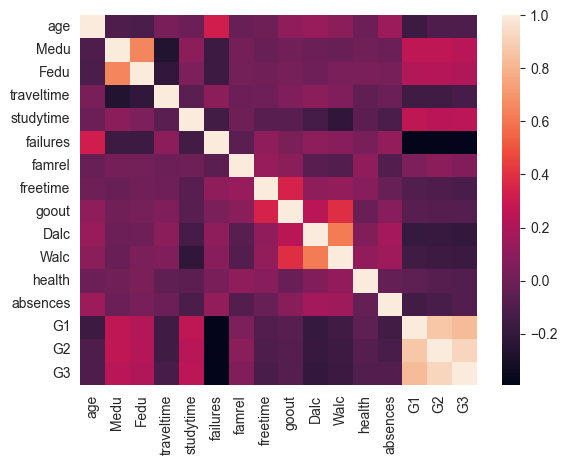

In [65]:
# 3 - Identifier quelle variable est la plus corrélée à G3
sns.heatmap(df.select_dtypes(include="number").corr())

In [66]:
df = df[["absences", "G2", "G3"]].copy()
df

,absences,G2,G3
0,4,11,11
1,2,11,11
2,6,13,12
3,0,14,14
4,0,13,13
...,...,...,...
644,4,11,10
645,4,15,16
646,6,12,9
647,6,10,10


In [83]:
# 1 - Séparer les variables en X_train, X_test, y_train et y_test
from sklearn.model_selection import train_test_split
X = df["G2"]
y = df["G3"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test

(     G2
 332  18
 29   11
 302  11
 286  12
 554  11
 ..   ..
 71    9
 106  10
 270  15
 435  10
 102  13
 
 [519 rows x 1 columns],
      G2
 636  18
 220  11
 594  18
 429  11
 72   11
 ..   ..
 514   6
 374  18
 444  10
 244  12
 601   8
 
 [130 rows x 1 columns],
 332    18
 29     12
 302    12
 286    13
 554    10
        ..
 71     10
 106    10
 270    15
 435    10
 102    12
 Name: G3, Length: 519, dtype: int64,
 636    19
 220    12
 594    18
 429    11
 72     11
        ..
 514     7
 374    17
 444    11
 244    12
 601    10
 Name: G3, Length: 130, dtype: int64)

# Implémentation de la descente de gradient

In [68]:
# 2 - Créer une classe Python CustomLinearRegression
class CustomLinearRegression:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.w = 0
        self.b = 0

    def fit(self, X, y):
        pass

    # 3 - Implémenter la méthode predict
    def predict(self, X):
        return self.w * X + self.b

In [69]:
# 4 - Créer une instance de cette classe, faire les prédictions
y_pred = CustomLinearRegression().predict(X=X_test)
y_pred

636    0
220    0
594    0
429    0
72     0
      ..
514    0
374    0
444    0
244    0
601    0
Name: G2, Length: 130, dtype: int64

In [70]:
# 5 - Calculer manuellement la MAE de cette première prédiction
mae = (y_test - y_pred).abs().mean()
mae

np.float64(12.353846153846154)

In [71]:
# 6 - Modifier CustomLinearRegression pour implémenter la méthode fit en utilisant la descente de gradient
class CustomLinearRegression:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.w = 0
        self.b = 0

    def fit(self, X, y):
        n = len(y)
        for _ in range(self.epochs):
            y_pred = self.predict(X)
            dw = (1 / n) * sum(X * (y_pred - y))
            db = (1 / n) * sum(y_pred - y)
            self.w -= self.lr * dw
            self.b -= self.lr * db
        return self

    def predict(self, X):
        return self.w * X + self.b

In [72]:
# 7 - Instancier à nouveau la classe modifiée, entraîner le modèle en appelant fit avec X_train et y_train, faire les prédiction de X_test et calculer la nouvelle MAE avec y_pred et y_test
custom_linear_regression = CustomLinearRegression()
y_pred = custom_linear_regression.fit(X_train, y_train).predict(X=X_test)
mae = (y_test - y_pred).abs().mean()
custom_linear_regression.w, custom_linear_regression.b, mae

(1.0263717436193758, 0.03655683136100107, np.float64(0.7279233858365322))

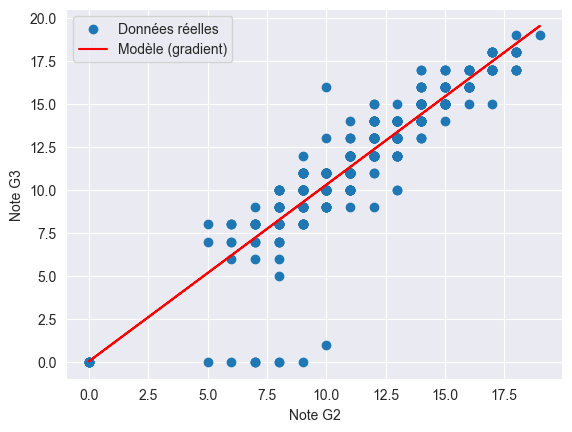

In [73]:
# 8 - Visualizer la droite obtenue
import matplotlib.pyplot as plt
plt.scatter(X, y, label="Données réelles")
plt.plot(X, custom_linear_regression.predict(X), color="red", label="Modèle (gradient)")
plt.legend()
plt.xlabel("Note G2")
plt.ylabel("Note G3")
plt.show()

Text(0.5, 1.0, 'Droites de régression avec différents paramètres')

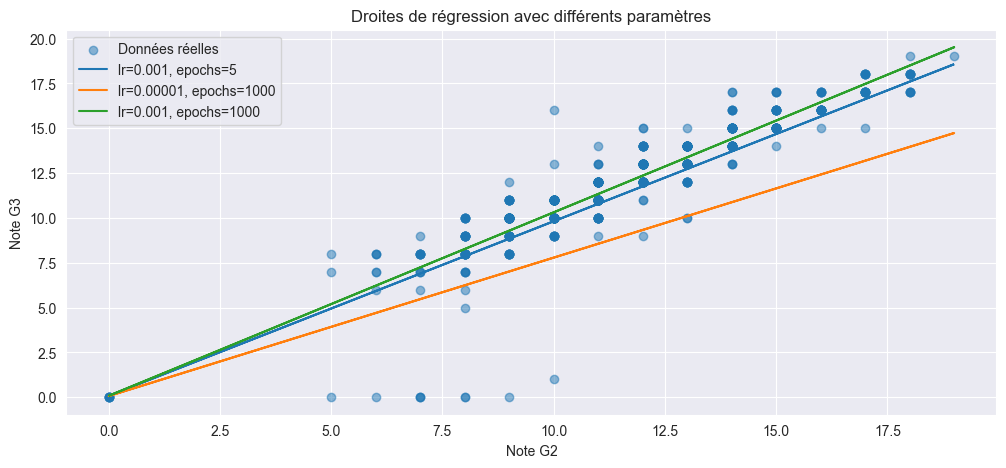

In [74]:
# 9 - Essayer de modifier les variables lr et epochs pour voir l'impact sur l'entraînement. Il est possible d'afficher la loss au fur et à mesure de l'entraînement pour vérifier la convergence du modèle
import matplotlib.pyplot as plt

configs = [
    {"lr": 0.001, "epochs": 5, "label": "lr=0.001, epochs=5"},
    {"lr": 0.00001, "epochs": 1000, "label": "lr=0.00001, epochs=1000"},
    {"lr": 0.001, "epochs": 1000, "label": "lr=0.001, epochs=1000"}
]

plt.figure(figsize=(12, 5))
plt.scatter(X, y, alpha=0.5, label="Données réelles")
for config in configs:
    model = CustomLinearRegression(lr=config["lr"], epochs=config["epochs"])
    model.fit(X_train, y_train)
    plt.plot(X, model.predict(X), label=config["label"])
plt.xlabel("Note G2")
plt.ylabel("Note G3")
plt.legend()
plt.title("Droites de régression avec différents paramètres")

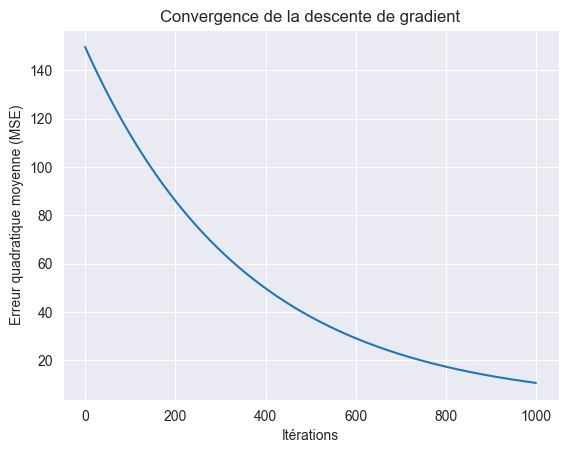

In [75]:
# Affichage de la convergence de la descente de gradient
import numpy as np

class CustomLinearRegression:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.w = 0
        self.b = 0
        self.loss = []

    def fit(self, X, y):
        n = len(y)
        for _ in range(self.epochs):
            y_pred = self.predict(X)
            dw = (1 / n) * sum(X * (y_pred - y))
            db = (1 / n) * sum(y_pred - y)
            self.w -= self.lr * dw
            self.b -= self.lr * db

            loss = np.mean((y_pred - y) ** 2)
            self.loss.append(loss)

        return self

    def predict(self, X):
        return self.w * X + self.b

custom_linear_regression = CustomLinearRegression(lr=0.00001).fit(X_train, y_train)
# Affichage de la convergence
plt.plot(custom_linear_regression.loss, label="Loss")
plt.title("Convergence de la descente de gradient")
plt.xlabel("Itérations")
plt.ylabel("Erreur quadratique moyenne (MSE)")
plt.grid(True)
plt.show()

# Comparaison avec scikit-learn

In [85]:
# 1 - Calculer la régression en utilisant LinearRegression et SGDRegressor de scikit-learn
from sklearn.linear_model import LinearRegression, SGDRegressor

linear_regression = LinearRegression()
sgd_regression = SGDRegressor(learning_rate="constant", eta0=0.01, max_iter=10000)

linear_regression.fit([[x] for x in X_train], y_train)
sgd_regression.fit([[x] for x in X_train], y_train)

y_pred_lr = linear_regression.predict([[x] for x in X_test])
y_pred_sgd = sgd_regression.predict([[x] for x in X_test])

,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,10000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,None


In [77]:
# 2 - Comparer les coefficients (w et b) obtenus avec ceux calculés manuellement
linear_w = linear_regression.coef_[0]
linear_b = linear_regression.intercept_

sgd_w = sgd_regression.coef_[0]
sgd_b = sgd_regression.intercept_

custom_w = custom_linear_regression.w
custom_b = custom_linear_regression.b

linear_w, linear_b, sgd_w, sgd_b, custom_w, custom_b

(np.float64(1.0312194658438762),
 np.float64(-0.022470449659985903),
 np.float64(1.0084977052613227),
 array([0.04326343]),
 0.7719057615790297,
 0.06333101054899724)

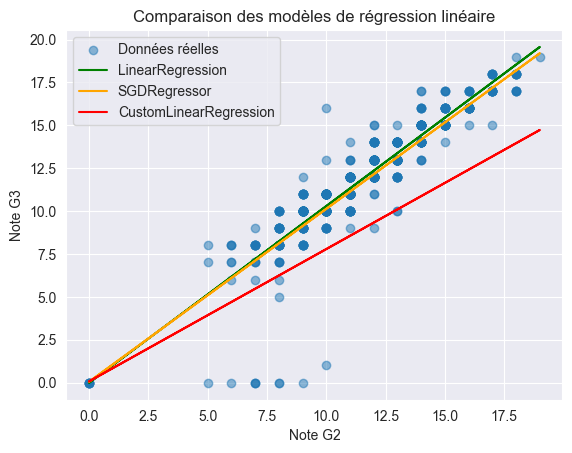

In [78]:
# Plot des trois modèles
import matplotlib.pyplot as plt

plt.scatter(X, y, alpha=0.5, label="Données réelles")
plt.plot(X, linear_regression.predict([[x] for x in X]), color="green", label="LinearRegression")
plt.plot(X, sgd_regression.predict([[x] for x in X]), color="orange", label="SGDRegressor")
plt.plot(X, custom_linear_regression.predict(X), color="red", label="CustomLinearRegression")
plt.xlabel("Note G2")
plt.ylabel("Note G3")
plt.legend()
plt.title("Comparaison des modèles de régression linéaire")
plt.show()

In [79]:
# 3 - Calculer les métriques suivantes (à l'aide de scikit-learn) :

# - R²
from sklearn.metrics import r2_score
r2_lr = r2_score(y_test, y_pred_lr)

# MSE
from sklearn.metrics import mean_squared_error
mse_lr = mean_squared_error(y_test, y_pred_lr)

# RMSE
from sklearn.metrics import mean_squared_error
rmse_lr = mean_squared_error(y_test, y_pred_lr)

r2_lr, mse_lr, rmse_lr

(0.8688085195086549, 1.2793420562660143, 1.2793420562660143)

# Analyse des résidus

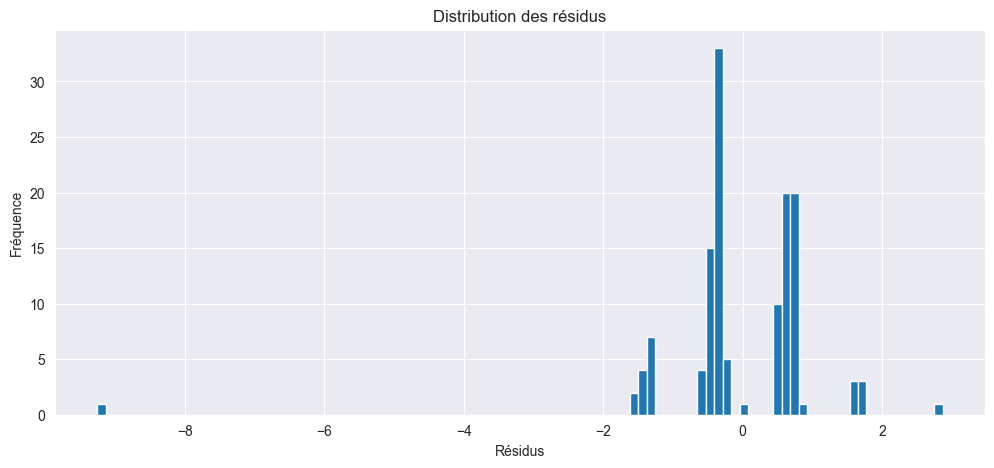

In [80]:
# En utilisant le modèle obtenu avec LinearRegression,
# - Afficher la distribution des résidus
# - Les résidus semblent-ils centrés autour de 0 ?
# - Leur distribution est-elle proche d’une loi normale ?
# - Observe-t-on une variance constante des erreurs (homoscedasticité) ?
import matplotlib.pyplot as plt

residuals = y_test - y_pred_lr
plt.figure(figsize=(12, 5))
plt.hist(residuals, bins=100)
plt.xlabel("Résidus")
plt.ylabel("Fréquence")
plt.title("Distribution des résidus")
plt.show()

# Pour aller plus loin

In [81]:
# 1. A l’aide de scikit-learn, calculer une nouvelle régression en ajoutant studytime en feature
# Cela améliore-t-il significativement le modèle ?
# Quelle variable a le plus d’importance dans le modèle ?
from sklearn.linear_model import LinearRegression

X_multi = df[["G2", "absences"]]
y_multi = df["G3"]
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

linear_regression_multi = LinearRegression()
linear_regression_multi.fit(X_train_multi, y_train_multi)
y_pred_multi = linear_regression_multi.predict(X_test_multi)

r2_multi = r2_score(y_test_multi, y_pred_multi)
features_importance = linear_regression_multi.coef_

r2_multi, features_importance

(0.8687679279723106, array([1.03493687, 0.01818811]))

In [82]:
# 2 - Utiliser une Pipeline scikit-learn et des scaler pour normaliser les données avant l'entraînement (min-max et/ou z-score). Cela améliore-t-il significativement le modèle ?
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

pipeline.fit(X_train_multi, y_train_multi)
y_pred_pipeline = pipeline.predict(X_test_multi)

r2_score(y_test_multi, y_pred_pipeline)

0.8687679279723106